<a href="https://colab.research.google.com/github/diegomarlop/Actiivities_IH/blob/main/Activities_1_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activities 1.07

## Activity 1

Refer to the files_for_activities/regression_data1.csv file. (The same file used in the class example.)

1. Draw a box plot for the IC2.
2. Print the descriptive statistics for IC2.
3. Remove the outliers from the column IC2.



In [35]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 

In [62]:
data = pd.read_csv('regression_data1.txt')

In [37]:
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0
...,...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000,25.0
4839,3357,284,455,343,447,24240,11.857143,19.0
4840,700,322,415,356,446,14360,11.333333,10.0
4841,601,206,225,251,289,9801,13.000000,25.0


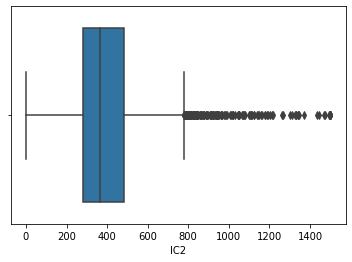

In [38]:
sns.boxplot(data['IC2'])

In [41]:
data['IC2'].describe()

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

In [55]:
iqr = np.percentile(data['IC2'],75)- np.percentile(data['IC2'],25)

In [56]:
upper_limit = np.percentile(data['IC2'],75)+1.5*iqr 
lower_limit = np.percentile(data['IC2'],25)-1.5*iqr

In [57]:
data = data[(data['IC2']>lower_limit) & (data['IC2']<upper_limit)]

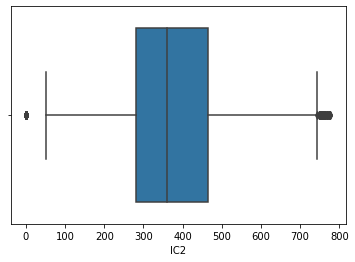

In [58]:
sns.boxplot(data['IC2'])

## Activity 2

Keep using the same file.

1. Repeat the process(log transformation) for the column IC3. Define the function again yourself.
2. Remove the tails of the transformed column to make it closer to the normal distribution. This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

In [46]:
def log_transf(x):
  x=np.log(x)
  if np.isfinite(x):
    return x 
  else: 
    return np.NAN

In [47]:
ic3_log = list(map(log_transf,data['IC3']))

In [48]:
data['IC3_log']=ic3_log

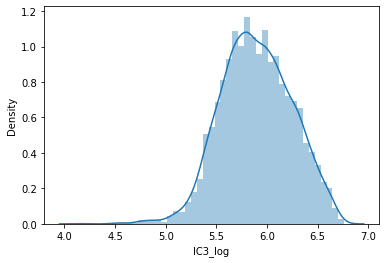

In [49]:
sns.distplot(data['IC3_log'])

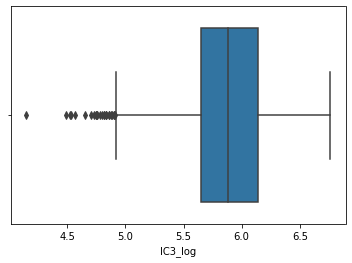

In [50]:
sns.boxplot(data['IC3_log'])

In [63]:
#con 1.5
iqr = np.percentile(data['IC3'],75)- np.percentile(data['IC3'],25)
upper_limit = np.percentile(data['IC3'],75)+1.5*iqr 
lower_limit = np.percentile(data['IC3'],25)-1.5*iqr

In [64]:
data = data[(data['IC3']>lower_limit) & (data['IC3']<upper_limit)]

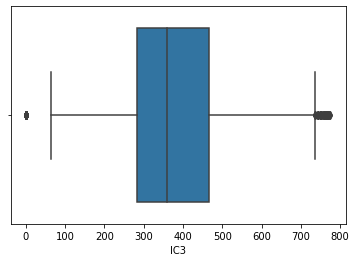

In [65]:
sns.boxplot(data['IC3'])

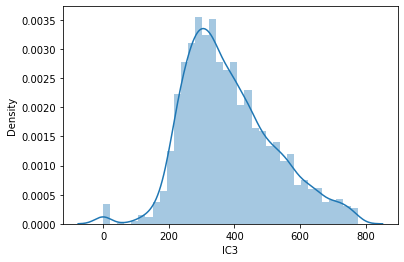

In [66]:
sns.distplot(data['IC3'])

In [59]:
# con 3 
iqr = np.percentile(data['IC3'],75)- np.percentile(data['IC3'],25)
upper_limit = np.percentile(data['IC3'],75)+3*iqr 
lower_limit = np.percentile(data['IC3'],25)-3*iqr

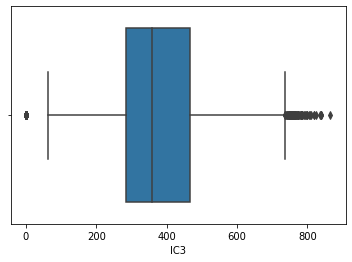

In [60]:
data = data[(data['IC3']>lower_limit) & (data['IC3']<upper_limit)]
sns.boxplot(data['IC3'])

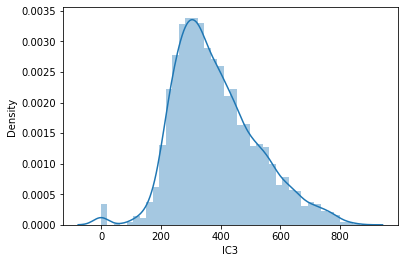

In [61]:
sns.distplot(data['IC3'])

## Activity 3 

1. Repeat the same steps for column IC5 for box-cox transformation.

In [67]:
data = pd.read_csv('regression_data1.txt')

In [68]:
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0
...,...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000,25.0
4839,3357,284,455,343,447,24240,11.857143,19.0
4840,700,322,415,356,446,14360,11.333333,10.0
4841,601,206,225,251,289,9801,13.000000,25.0


In [69]:
#Aqui calculamos el % de datos que no cumplen con la condicion necesaria para la transf
100*len(data[data['IC5']<=0])/len(data['IC5'])

0.7226925459425976

In [70]:
data['IC5_p']=np.where(data['IC5']<0,0,data['IC5']) 

In [71]:
#Aqui le estoy diciendo que reemplace los valores 0 por la media 
data['IC5_p']=data['IC5_p'].replace(0,np.sum(data['IC5_p'])/len(data['IC5_p']))

In [72]:
from scipy import stats 

x,lmbda=stats.boxcox(data['IC5_p'])

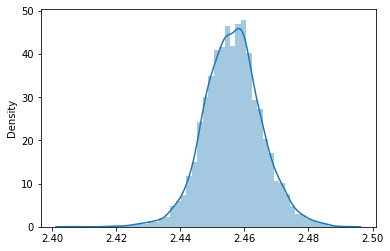

In [73]:
sns.distplot(x)

## Activity 4 

1. Load data regression_data.csv.
2. Select 3 numeric columns.
3. Plot distributions.
4. Normalize.
5. Plot new distributions.

In [74]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 

data=pd.read_csv('regression_data1.txt')
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0
...,...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000,25.0
4839,3357,284,455,343,447,24240,11.857143,19.0
4840,700,322,415,356,446,14360,11.333333,10.0
4841,601,206,225,251,289,9801,13.000000,25.0


In [75]:
#Separamos nuestro target de nuestros fueatures 
y= data['TARGET_D']
X=data.drop(['TARGET_D'],axis=1)

In [77]:
#separar la info numerica de la categorica 
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object)

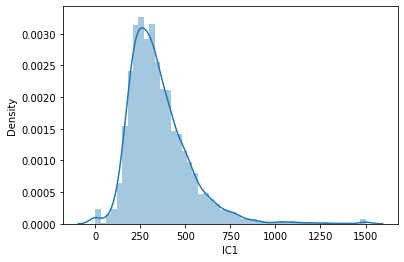

In [78]:
sns.distplot(X_num['IC1'])

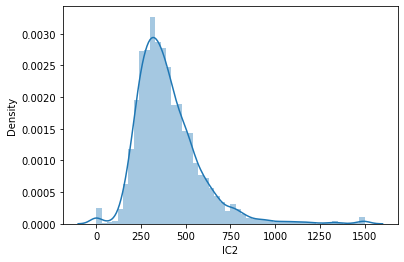

In [79]:
sns.distplot(X_num['IC2'])

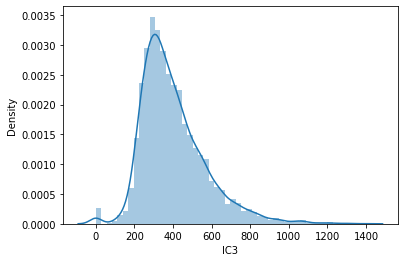

In [80]:
sns.distplot(X_num['IC3'])

In [85]:
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
#Esto me forma la herramienta para escalar los datos con base en cierta info de entrada(en este caso con X_num)
transformer=Normalizer().fit(X_num)
X_normalized=transformer.transform(X_num)
#Aqui la estmaosa convirtiendo en un dataframe 
X_normalized_df=pd.DataFrame(X_normalized)

In [86]:
X_normalized_df

,0,1,2,3,4,5,6
0,0.158850,0.028439,0.030199,0.031689,0.034059,0.985333,0.001050
1,0.042373,0.029840,0.031034,0.030437,0.032739,0.997172,0.000263
2,0.070689,0.026976,0.028874,0.029161,0.031289,0.995797,0.000431
3,0.051162,0.023298,0.028493,0.026919,0.032901,0.997106,0.001055
4,0.097819,0.022162,0.025601,0.028021,0.031715,0.993727,0.001119
...,...,...,...,...,...,...,...
4838,0.045837,0.019420,0.021905,0.026482,0.030602,0.997699,0.001014
4839,0.137112,0.011600,0.018584,0.014009,0.018257,0.990046,0.000484
4840,0.048618,0.022364,0.028824,0.024726,0.030977,0.997363,0.000787
4841,0.061129,0.020953,0.022885,0.025530,0.029395,0.996887,0.001322


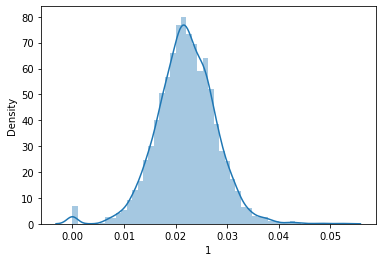

In [87]:
sns.distplot(X_normalized_df[1])

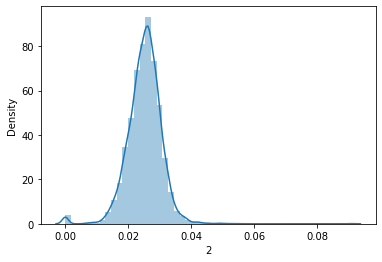

In [88]:
sns.distplot(X_normalized_df[2])

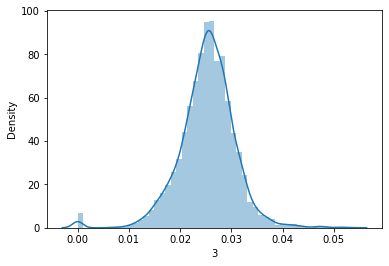

In [89]:
sns.distplot(X_normalized_df[3])